In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

Next, let's unpack our lat_lngs zip object into a list. This way, we only need to create a set of random latitudes and longitudes once. In a new cell in the WeatherPy.ipynb file, add the following code and run the cell.

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

51.14301304444925 -40.64024657919407
-58.17713810130075 -44.3650931814374
-69.78451132565323 143.43448145576332
-65.25614320772144 -97.60588326628138
-24.670750022063928 176.77900856182322
-14.830888957745344 -142.31453485157797
-88.4312888049084 -69.19870574996372
-41.09403504893992 74.65599635156715
86.11102094715815 -32.63274721964635
-37.20733477517537 -18.549917477964897
-14.997529523499352 -157.4422072214461
-47.399029392237594 158.03671781895906
79.49016256568427 111.52486507870736
56.170734703336564 145.38697681060307
25.350276037964548 -62.080885162754925
-56.81091201401772 -87.8545004279674
-35.697715250149656 103.93109514237238
87.91857661215275 76.92971206123082
4.868703338517378 27.605041388877794
-66.67268492243034 -157.20657545103677
-1.1540880720031197 173.68408960380827
-83.55555967821468 -173.2767720121784
-44.70076958808457 88.63153109480874
-79.24743083408664 -94.83883136956955
61.339870055215385 14.11470504019843
-31.100930248532173 -55.58198934861612
53.8718963317

In [6]:
from citipy import citipy


In [7]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

nanortalik gl
mar del plata ar
hobart au
punta arenas cl
isangel vu
atuona pf
ushuaia ar
mahebourg mu
illoqqortoormiut gl
jamestown sh
faanui pf
tuatapere nz
saskylakh ru
okha ru
the valley ai
punta arenas cl
busselton au
dikson ru
tambura sd
mataura pf
temaraia ki
vaini to
busselton au
punta arenas cl
borlange se
rivera uy
provideniya ru
ondjiva ao
east london za
nikolskoye ru
bluff nz
imbituva br
lubao cd
hilo us
mahebourg mu
mataura pf
maragogi br
ushuaia ar
bredasdorp za
saint-philippe re
arraial do cabo br
pudozh ru
geraldton ca
joensuu fi
guerrero negro mx
albany au
jamestown sh
sulina ro
pevek ru
belushya guba ru
puerto ayora ec
cabo san lucas mx
clyde river ca
krasnoyarsk-66 ru
mehamn no
bengkulu id
sisimiut gl
bella vista py
jamestown sh
butaritari ki
rikitea pf
bluff nz
ondorhaan mn
mataura pf
punta arenas cl
cidreira br
avera pf
hammerfest no
butaritari ki
ayer itam my
albany au
upernavik gl
port elizabeth za
hilo us
tuktoyaktuk ca
saint-philippe re
bengkulu id
jamestown sh


We create a cities list to store city names.
We iterate through the coordinates, as in our practice, and retrieve the nearest city using the latitude and longitude pair.
We add a decision statement with the logical operator not in to determine whether the found city is already in the cities list. If not, then we'll use the append() function to add it. We are doing this because among the 1,500 latitudes and longitudes, there might be duplicates, which will retrieve duplicate cities, and we want to be sure we capture only the unique cities.

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

 Pair coordinates with API response information to create a data frame that shows:
- City, country, and date
- Latitude and longitude
- Maximum temperature
- Humidity
- Cloudiness
- Wind speed

## Get weather data for each city

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=" + weather_api_key

In [10]:
# Import our dependencies and initialize counters and an empty list that will hold the weather data
import time
from datetime import datetime


# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


We create the for loop with the enumerate() method and reference the index and the city in the list.
In the conditional statement, we check if the remainder of the index divided by 50 is equal to 0 and if the index is greater than or equal to 50. If the statement is true, then the set_count and the record_count are incremented by 1.
Inside the conditional statement, we create the URL endpoint for each city, as before. However, we are removing the blank spaces in the city name and concatenating the city name with, city.replace(" ","+"). This will find the corresponding weather data for the city instead of finding the weather data for the first part of the city name.
Also, we add a print statement that tells us the record count and set count, and the city that is being processed.
Then we add one to the record count before the next city is processed.

In [11]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Make an API request for each city.
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 13 | nanortalik
Processing Record 2 of Set 13 | mar del plata
Processing Record 3 of Set 13 | hobart
Processing Record 4 of Set 13 | punta arenas
Processing Record 5 of Set 13 | isangel
Processing Record 6 of Set 13 | atuona
Processing Record 7 of Set 13 | ushuaia
Processing Record 8 of Set 13 | mahebourg
Processing Record 9 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 13 | jamestown
Processing Record 11 of Set 13 | faanui
Processing Record 12 of Set 13 | tuatapere
Processing Record 13 of Set 13 | saskylakh
Processing Record 14 of Set 13 | okha
Processing Record 15 of Set 13 | the valley
Processing Record 16 of Set 13 | busselton
Processing Record 17 of Set 13 | dikson
Processing Record 18 of Set 13 | tambura
Processing Record 19 of Set 13 | mataura
Processing Record 20 of Set 13 | temaraia
City not found. Skipping...
Processing Record 21 of Set 13 | vaini
Processing Record 22 of Set 13 | borlange
City not found. Skippi

We'll add a try-except block to our code to prevent the API request from stopping prematurely if the city_weather request isn't a valid response. If the request isn't valid, the code will not find the first item requested, which is the dictionary "coord" with the code city_lat = city_weather["coord"]["lat"], and skip the city and continue to run

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nanortalik,60.1432,-45.2371,34.54,80,99,7.83,GL,2022-10-27 19:41:10
1,Mar Del Plata,-38.0023,-57.5575,77.02,39,0,11.50,AR,2022-10-27 19:40:35
2,Hobart,-42.8794,147.3294,55.26,98,75,4.61,AU,2022-10-27 19:41:11
3,Punta Arenas,-53.1500,-70.9167,46.42,57,100,6.91,CL,2022-10-27 19:38:03
4,Isangel,-19.5500,169.2667,77.92,81,87,7.90,VU,2022-10-27 19:37:47
5,Atuona,-9.8000,-139.0333,76.98,73,55,17.94,PF,2022-10-27 19:41:13
6,Ushuaia,-54.8000,-68.3000,51.42,53,20,13.80,AR,2022-10-27 19:39:40
7,Mahebourg,-20.4081,57.7000,73.69,78,40,5.75,MU,2022-10-27 19:41:14
8,Jamestown,42.0970,-79.2353,53.53,62,0,9.22,US,2022-10-27 19:41:00
9,Faanui,-16.4833,-151.7500,79.63,66,100,5.99,PF,2022-10-27 19:41:15


In [13]:
# new_column_order = ["column2", "column4", "column1"]
# df = df[new_column_order]
# we'll reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, 
# and Wind Speed, so they are easy to read.


In [14]:
new_order = ["City","Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
new_city_data_df = city_data_df[new_order]

In [15]:
new_city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nanortalik,GL,2022-10-27 19:41:10,60.1432,-45.2371,34.54,80,99,7.83
1,Mar Del Plata,AR,2022-10-27 19:40:35,-38.0023,-57.5575,77.02,39,0,11.50
2,Hobart,AU,2022-10-27 19:41:11,-42.8794,147.3294,55.26,98,75,4.61
3,Punta Arenas,CL,2022-10-27 19:38:03,-53.1500,-70.9167,46.42,57,100,6.91
4,Isangel,VU,2022-10-27 19:37:47,-19.5500,169.2667,77.92,81,87,7.90
5,Atuona,PF,2022-10-27 19:41:13,-9.8000,-139.0333,76.98,73,55,17.94
6,Ushuaia,AR,2022-10-27 19:39:40,-54.8000,-68.3000,51.42,53,20,13.80
7,Mahebourg,MU,2022-10-27 19:41:14,-20.4081,57.7000,73.69,78,40,5.75
8,Jamestown,US,2022-10-27 19:41:00,42.0970,-79.2353,53.53,62,0,9.22
9,Faanui,PF,2022-10-27 19:41:15,-16.4833,-151.7500,79.63,66,100,5.99


In [16]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
new_city_data_df.to_csv(output_data_file, index_label="City_ID")

### Create a Linear Regression Function

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = new_city_data_df.loc[13]

In [21]:
index13

City                   The Valley
Country                        AI
Date          2022-10-27 19:41:18
Lat                        18.217
Lng                      -63.0578
Max Temp                    84.34
Humidity                       70
Cloudiness                     20
Wind Speed                  16.11
Name: 13, dtype: object

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

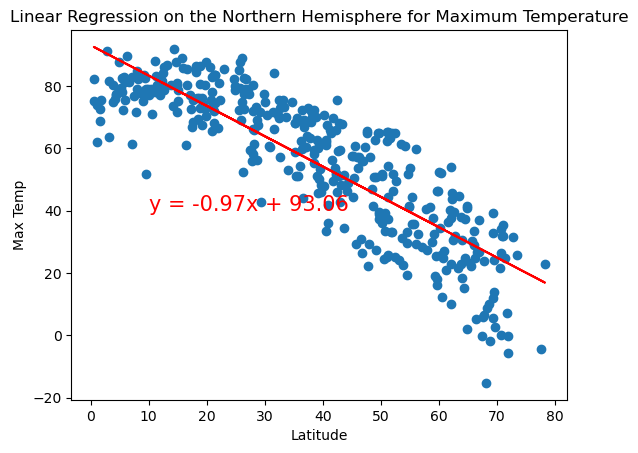

In [33]:
# Linear regression on the Northern Hemisphere Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

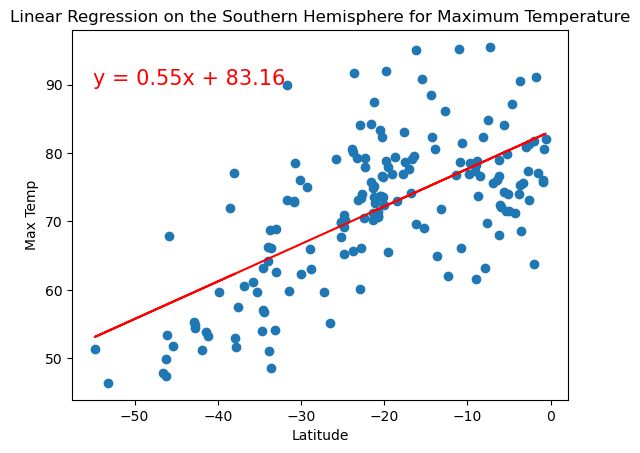

In [49]:
# Linear regression on the Southern Hemisphere Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-55,90))

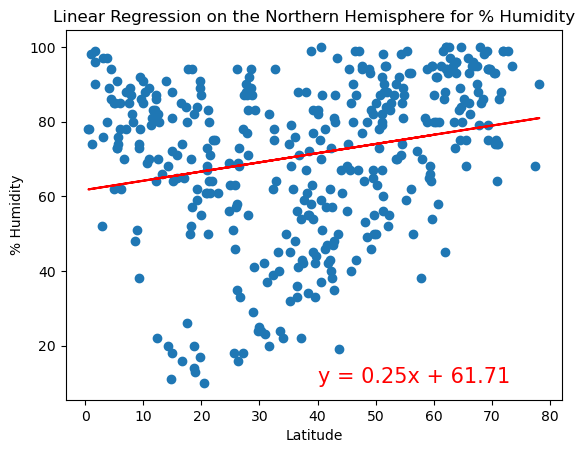

In [35]:
# Linear regression on the Northern Hemisphere Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

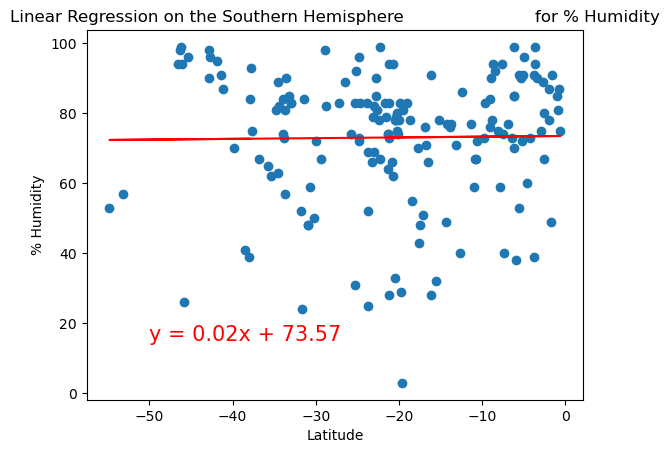

In [36]:
# Linear regression on the Southern Hemisphere Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

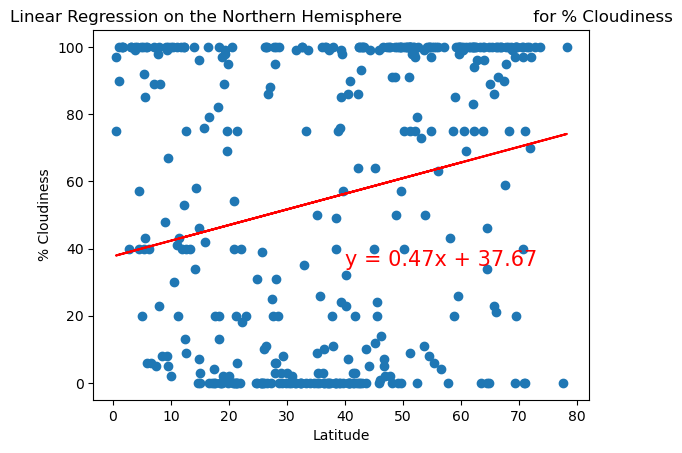

In [46]:
# Linear regression on the Northern Hemisphere Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,35))

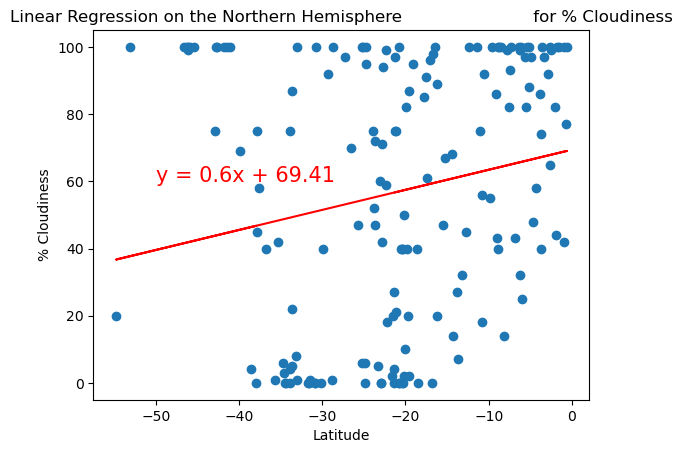

In [39]:
# Linear regression on the Southern Hemisphere Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

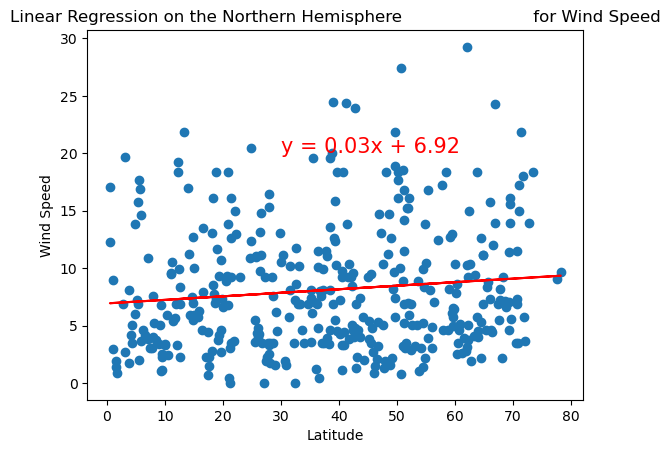

In [43]:
# Linear regression on the Northern Hemisphere Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(30,20))

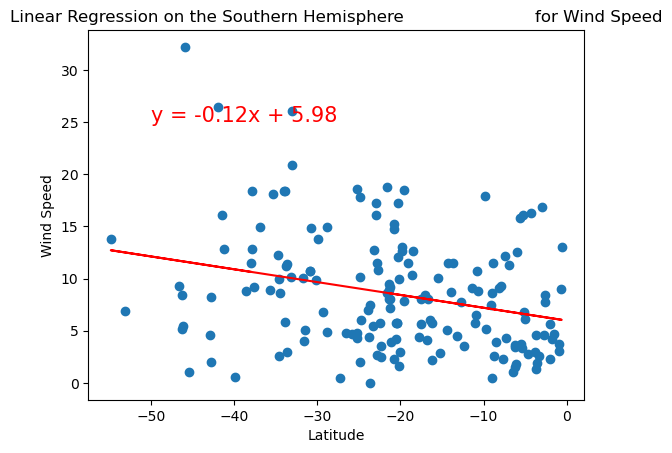

In [51]:
# Linear regression on the Southern Hemisphere Wind
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))